# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

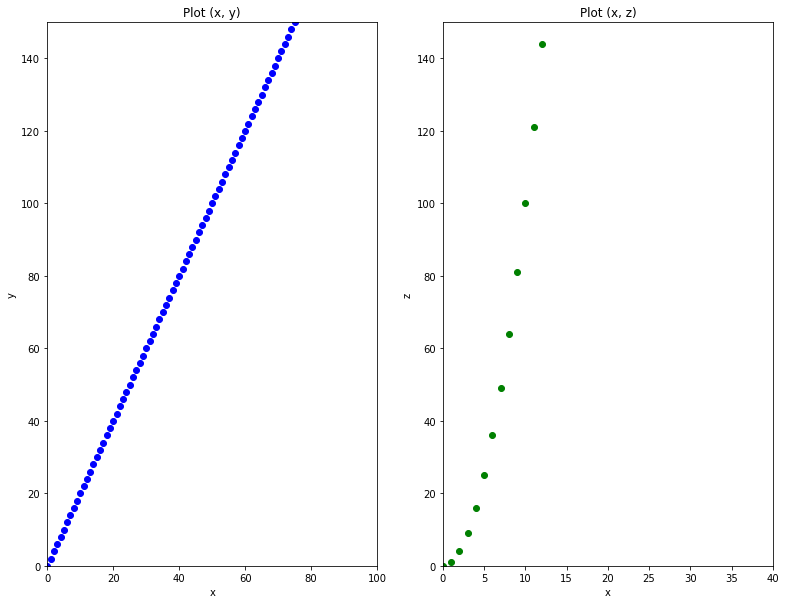

In [3]:
# Method 1

fig = plt.figure(figsize=(13,10))

# or fig.add_subplot(1,2,1) == (nrows, ncols, index)
fig.add_subplot(121)
plt.scatter(x, y, color='blue')
plt.axis([0,100,0,150])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Plot (x, y)')

fig.add_subplot(122)
plt.scatter(x, z, color='green')
plt.axis([0,40,0,150])
plt.ylabel('z')
plt.xlabel('x')
plt.title('Plot (x, z)')

plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

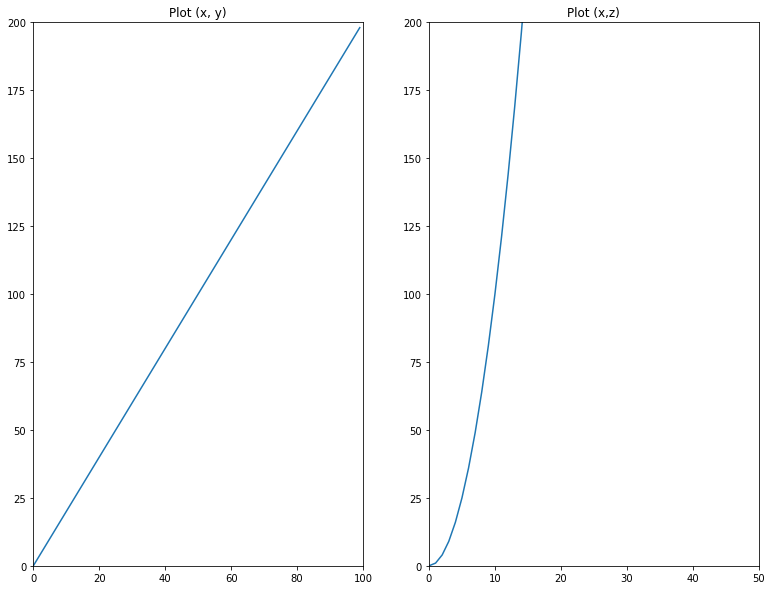

In [4]:
# Method 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,10));

#plot 1:
plt.subplot(1, 2, 1)
plt.plot(x,y)

plt.title('Plot (x, y)')
plt.axis([0,100,0,200])

#plot 2:
plt.subplot(1, 2, 2)
plt.plot(x,z)

plt.title('Plot (x,z)')
plt.axis([0,50,0,200])

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [5]:
# Was done in the previus code

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

(0.0, 15.0, 0.0, 100.0)

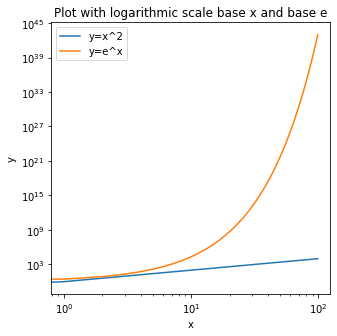

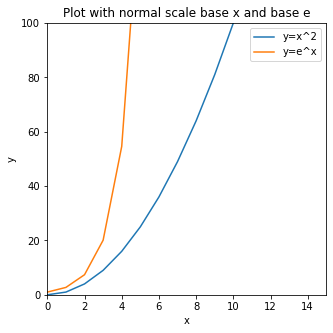

In [5]:
# give values to the variables

x = np.arange(0,100)
y = x**2
z= (math.e)**x

# the first plot usind logarithmic scale:

fig1, ax1 = plt.subplots(figsize=(5,5))

ax1.plot(x, y, label = 'y=x^2')
ax1.plot(x, z, label = 'y=e^x')

ax1.legend()
ax1.set_title('Plot with logarithmic scale base x and base e')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xscale('log')
ax1.set_yscale('log')

# the first plot usind normal scale:

fig2, ax2 = plt.subplots(figsize=(5,5))

ax2.plot(x, y, label = 'y=x^2')
ax2.plot(x, z, label = 'y=e^x')

ax2.legend()
ax2.set_title('Plot with normal scale base x and base e')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.axis([0,15,0,100])


#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
#Done in the previus code

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [80]:
# import the dataset and store it
fitbit = pd.read_csv('./Fitbit2.csv')

# See the information store in the dataset
fitbit.info()
fitbit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

No handles with labels found to put in legend.


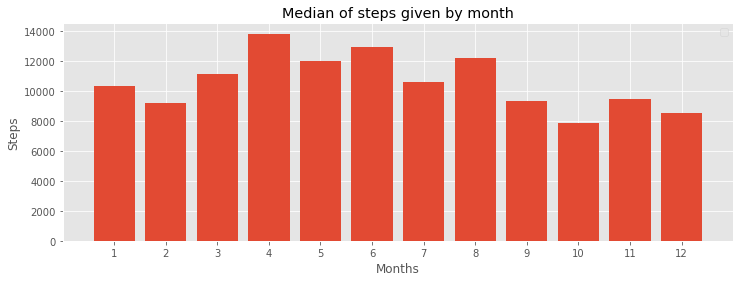

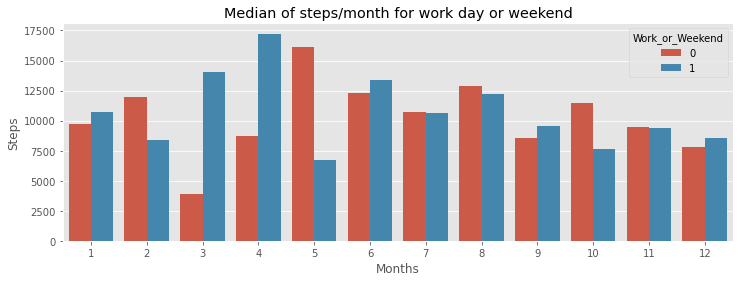

In [79]:
# MEDIAN STEPS BY MONTH_ENCODED
# define the variables:
median_steps = fitbit.groupby('Months_encoded')['Steps'].median()
plt.style.use('ggplot')

fig1, ax1 = plt.subplots(figsize=(12,4))

ax1.bar(median_steps.index, median_steps.values)

ax1.legend()
ax1.set_title('Median of steps given by month')
ax1.set_xlabel('Months')
ax1.set_xticks(median_steps.index)
ax1.set_ylabel('Steps')

# The number of steps change during the different months. The most active period seems to be from April to August,
# maybe because the weather is better.

# MEDIAN STEPS BY WORK_OR_WEEKEND
# define the variables:
median_steps_w = fitbit.groupby(['Months_encoded', 'Work_or_Weekend'])['Steps'].median()
median_steps_w = median_steps_w.to_frame()
median_steps_w = median_steps_w.reset_index()

fig2, ax2 = plt.subplots(figsize=(12,4))
ax2 = sns.barplot(x = 'Months_encoded', y = 'Steps', hue = 'Work_or_Weekend', data = median_steps_w)

ax2.set_title('Median of steps/month for workday or weekend')
ax2.set_xlabel('Months')
ax2.set_ylabel('Steps')

# It’s difficult to answer if the Fitbitter is more active during weekends or workdays.
# One thing that might have influence in the data and to which we don’t have access to is whether the person was on vacations.


# Save the figures
import os

#Create the folder
outpath = "./figures"
os.mkdir(outpath)

#Save each figure
fig1.savefig('./figures/medias_steps_by_month.png')
fig2.savefig('./figures/medias_steps_by_month_workday_or_not.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

No handles with labels found to put in legend.


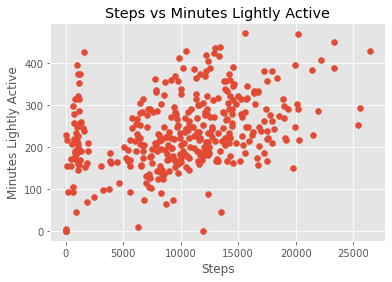

No handles with labels found to put in legend.


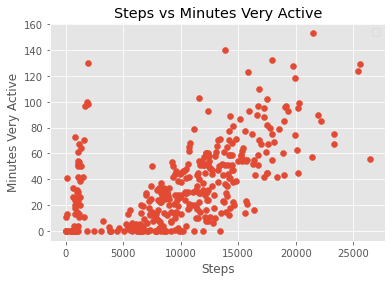

No handles with labels found to put in legend.


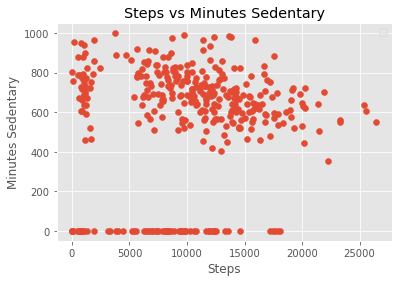

In [84]:
# your code here

y_columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
x_col = 'Steps'

for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(fitbit[x_col], fitbit[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()



## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [2]:
# import the dataset and store it
titanic = pd.read_csv('./titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [4]:
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [11]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:ylabel='Frequency'>

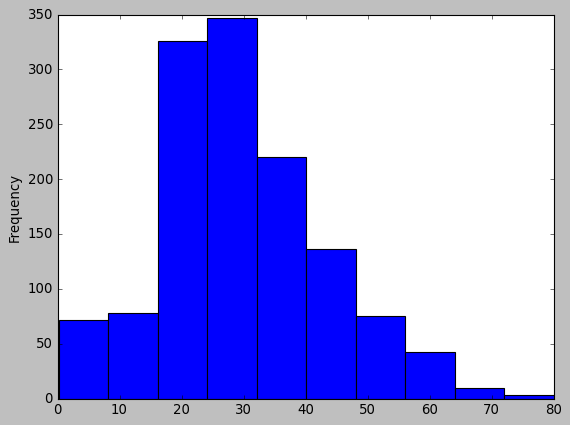

In [15]:
titanic['Age'].plot.hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

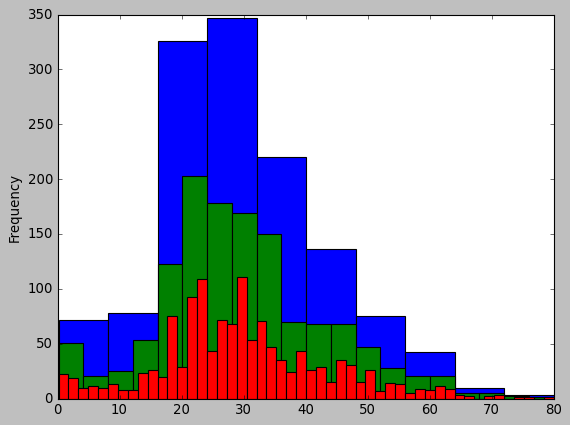

In [20]:
titanic['Age'].plot.hist(bins = 10)
titanic['Age'].plot.hist(bins = 20)
titanic['Age'].plot.hist(bins = 50)

#### How does the bin size affect your plot?

In [ ]:
"""
With smaller bins the division of age intervals are bigger 
and it’s better to obtain general information
like the most frequent ages.

When we have more divisions in our age interval,
we have a plot that shows in a more detailed way 
the real information regarding the age of passengers of the titanic.
"""

#### Use seaborn to show the distribution of column `Age`.

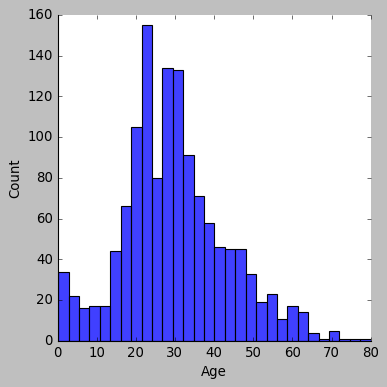

In [21]:

sns.displot(titanic, x="Age")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

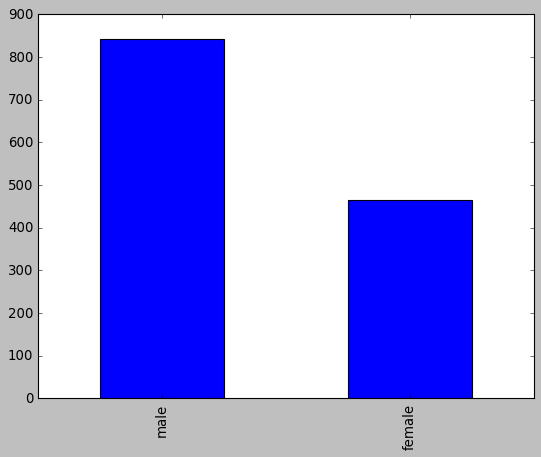

In [27]:
# Method 1 - matplotlib
titanic['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='count'>

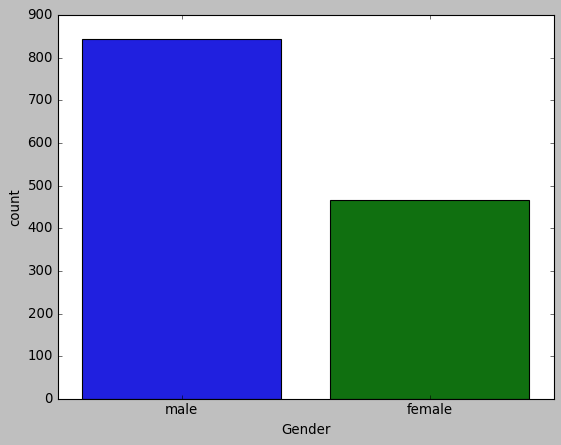

In [32]:
# Method 2 - seaborn

sns.countplot(x="Gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

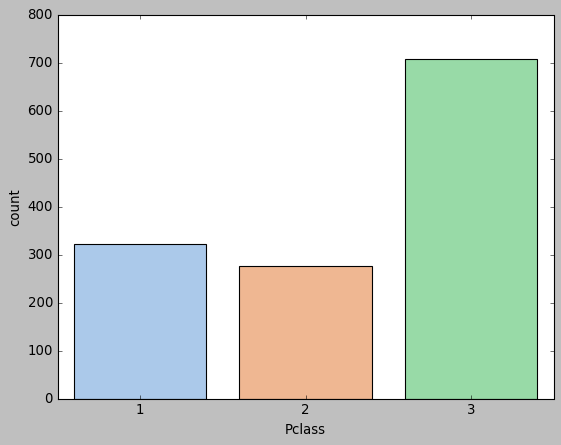

In [48]:
sns.countplot(x="Pclass", data=titanic, palette = 'pastel')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

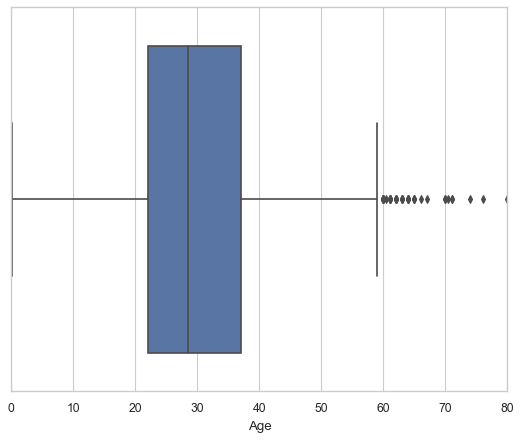

In [66]:
desc_titanic = titanic["Age"].describe() 

# I would use a boxplot to see the summary statistics

# Can be used with matplotlib:
# titanic["Age"].plot.box()

sns.set_theme(style="whitegrid")
sns.boxplot(x=titanic["Age"])

In [ ]:
"""
The box shows the quartiles of the dataset
while the whiskers extend to show the rest of the distribution,
except for points that are determined to be “outliers” 
using a method that is a function of the inter-quartile range.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The average age of passengers was near 30 years.
Most of the passengers were between 20 and 40 years.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

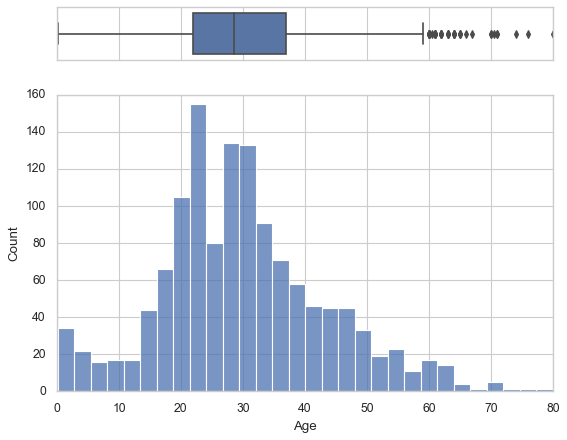

In [109]:
# Create subplots
fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Plot the distribuition and the summary statistics 
sns.boxplot(x=titanic["Age"], ax=ax_box)
sns.histplot(data=titanic, x="Age", ax=ax_hist)


ax_box.set(xlabel='')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""

"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

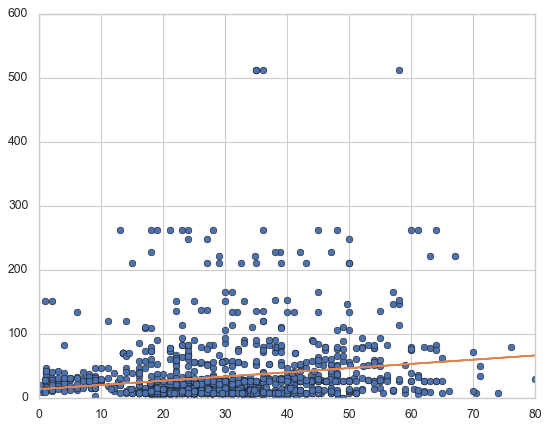

In [129]:
# Method 1 - matplotlib
age = titanic['Age']
fare = titanic['Fare']
plt.plot(age, fare, 'o')
m, b = np.polyfit(age, fare, 1)
plt.plot(age, m*age+b)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

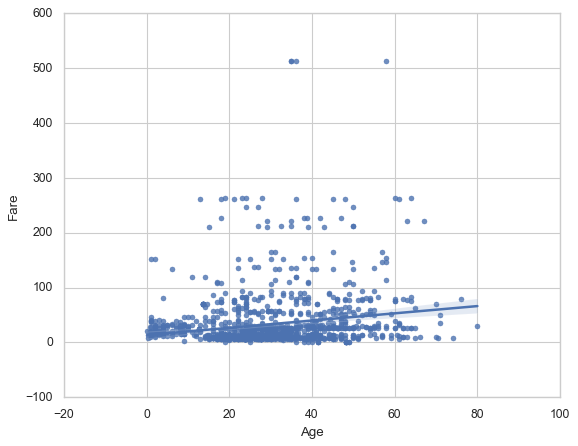

In [121]:
# Method 2 - seaborn
sns.regplot(x="Age", y="Fare", data=titanic)


#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here